## Ali Bayat
#### Project: The Impact of Structural Oil Price Shocks on the Renewable Energy Sector
#### Fall 2023



Import the Following Libraries:

In [105]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from statsmodels.tsa.base.datetools import dates_from_str

In [108]:
vardata1 = pd.read_csv("/Users/Shared/Files From e.localized/book/Master Tehran/Proposal/The Impact of Oil Price Shocks on the Reneable Energy Sector/Coding/vardata_sp.csv")

In [109]:
vardata1.head

<bound method NDFrame.head of          prod          ea         po        pg
0   -0.329232  123.283490 -55.849177  2.078391
1   -0.051715  127.380310 -54.155702  1.433588
2   -0.034958  121.306530 -49.691063 -1.983509
3   -0.079750  107.951000 -49.293135 -3.963517
4   -0.433439   85.515975 -39.890576 -1.649469
..        ...         ...        ...       ...
187  1.386815   26.491686 -26.710717  1.603119
188 -2.041050   39.451190 -23.501857 -0.754583
189  2.289494   18.273159 -28.915381 -2.096540
190  1.189996   -7.003679 -27.589811  2.680938
191 -0.028711   -9.786573 -24.955306  6.772315

[192 rows x 4 columns]>

In [110]:
vardata1.rename(columns={'ea':'rea', 'pg': 'PSE'}, inplace=True)  #pg to the Index

In [111]:
vardata1.head

<bound method NDFrame.head of          prod         rea         po       PSE
0   -0.329232  123.283490 -55.849177  2.078391
1   -0.051715  127.380310 -54.155702  1.433588
2   -0.034958  121.306530 -49.691063 -1.983509
3   -0.079750  107.951000 -49.293135 -3.963517
4   -0.433439   85.515975 -39.890576 -1.649469
..        ...         ...        ...       ...
187  1.386815   26.491686 -26.710717  1.603119
188 -2.041050   39.451190 -23.501857 -0.754583
189  2.289494   18.273159 -28.915381 -2.096540
190  1.189996   -7.003679 -27.589811  2.680938
191 -0.028711   -9.786573 -24.955306  6.772315

[192 rows x 4 columns]>

In [112]:
print(vardata1.isna().sum())


prod    0
rea     0
po      0
PSE     0
dtype: int64


<AxesSubplot:>

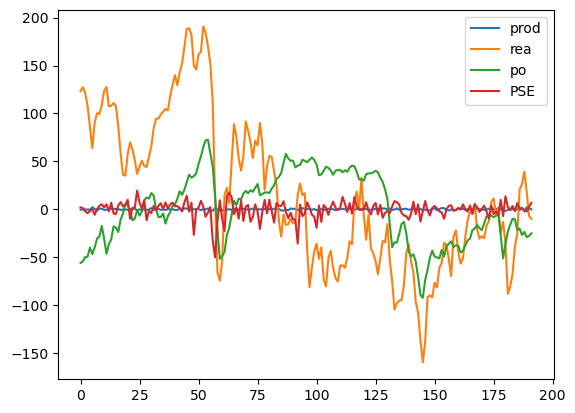

In [113]:
vardata1.plot()

In [114]:
model = VAR(vardata1)

In [133]:
results = model.fit(24)

In [134]:
results

In [135]:
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 07, May, 2023
Time:                     16:41:43
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                    14.2936
Nobs:                     190.000    HQIC:                   13.9276
Log likelihood:          -2341.84    FPE:                    872099.
AIC:                      13.6784    Det(Omega_mle):         724716.
--------------------------------------------------------------------
Results for equation prod
             coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------
const           0.083472         0.052194            1.599           0.110
L1.prod        -0.087011         0.072688           -1.197           0.231
L1.rea          0.002723         0.002463            1.105           0.269
L1.po     

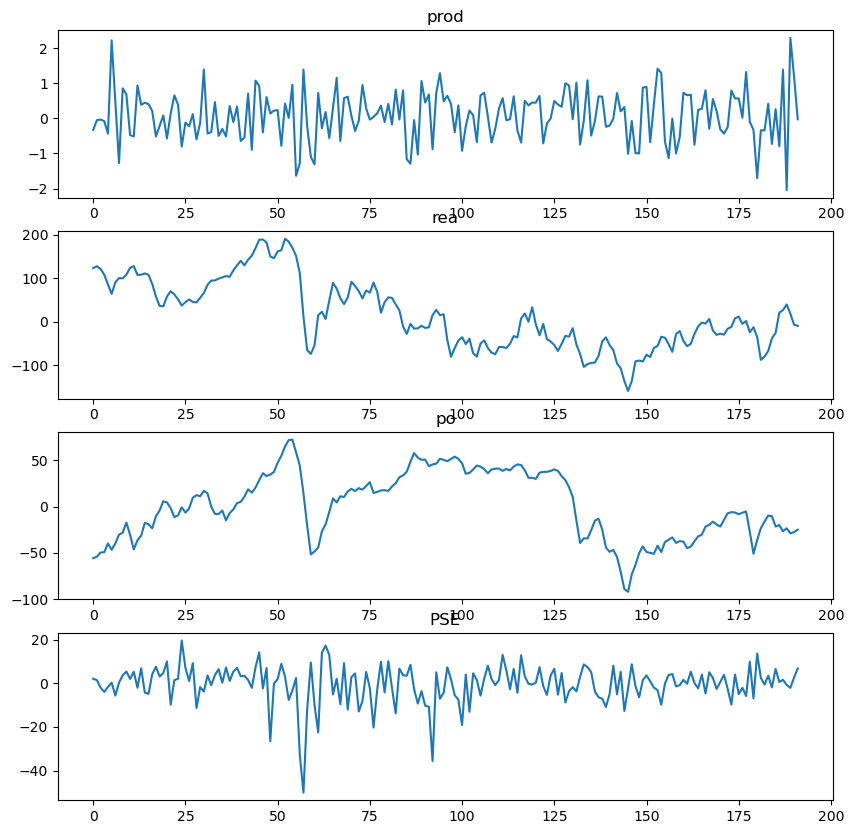

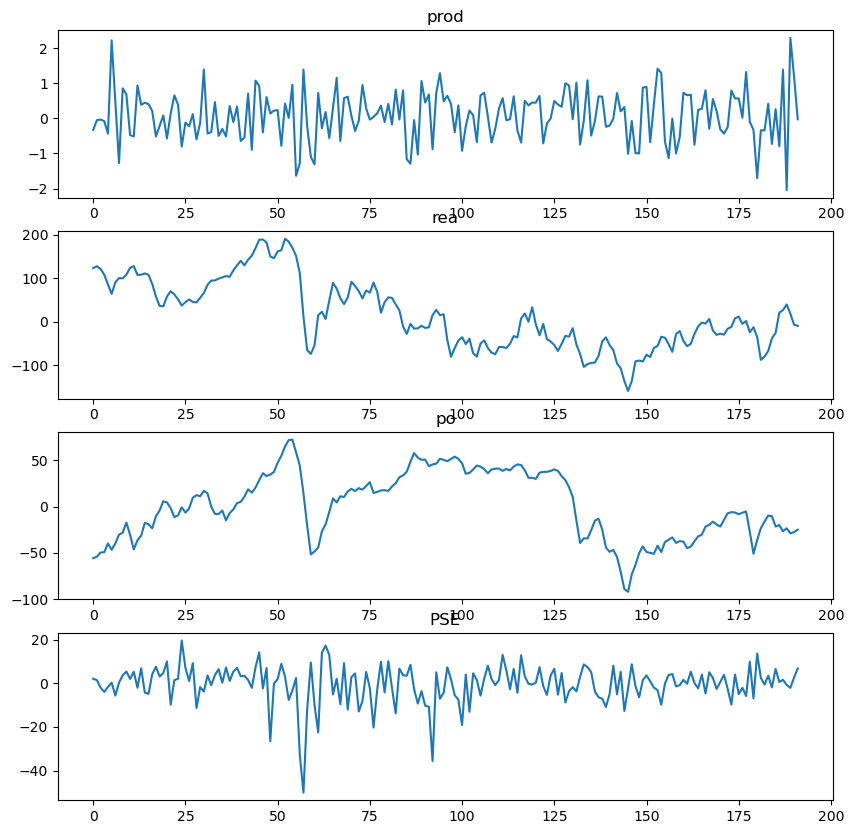

In [136]:
results.plot()

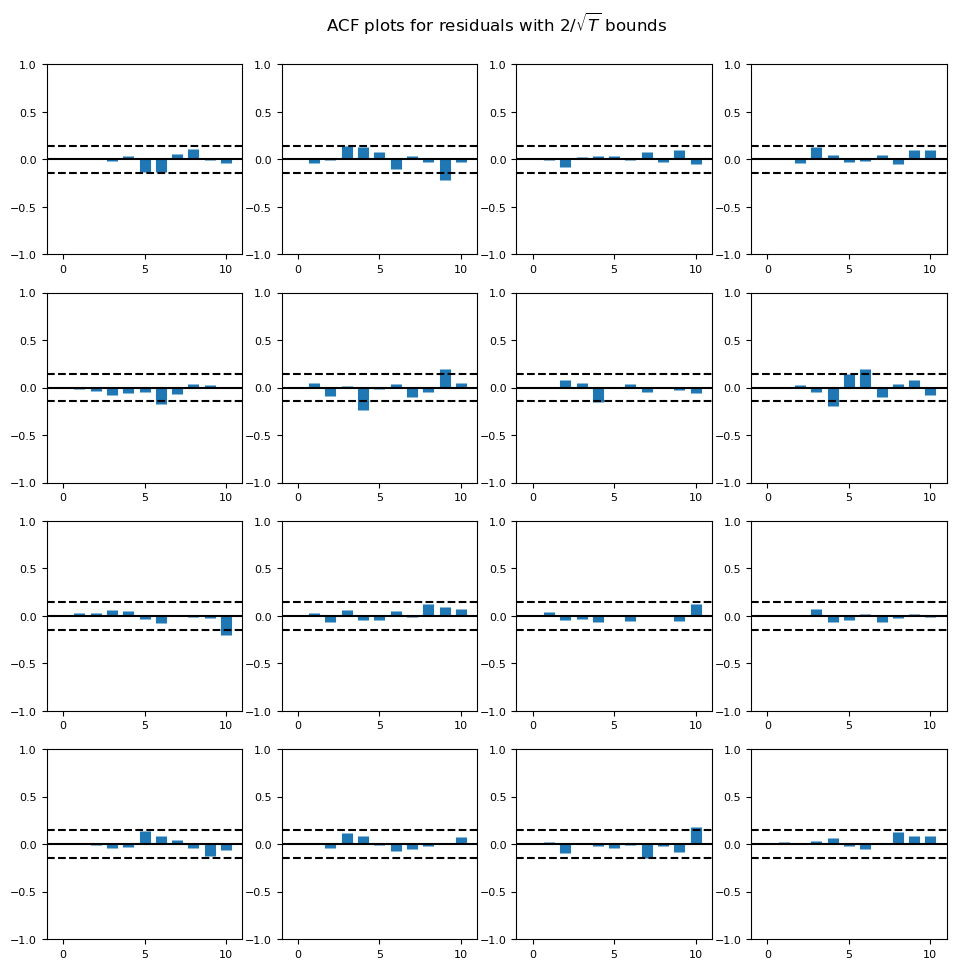

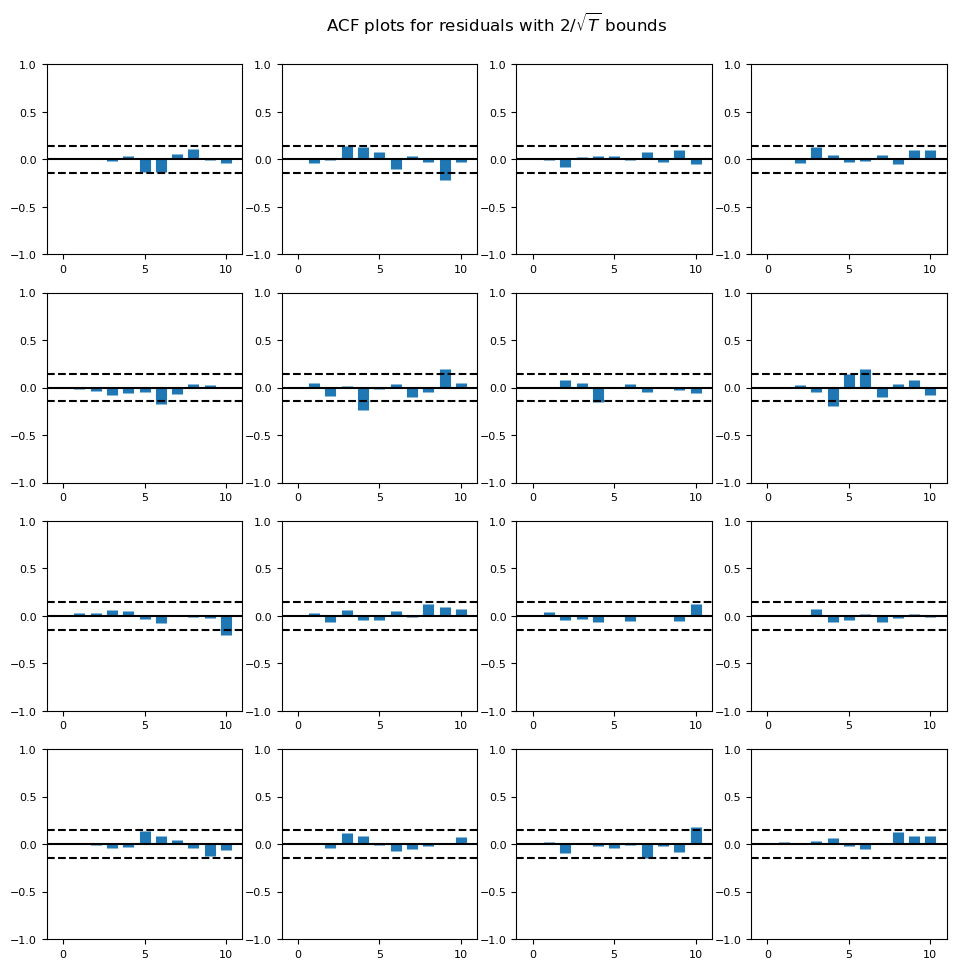

In [137]:
results.plot_acorr()

In [138]:
model.select_order(24).summary()

,AIC,BIC,FPE,HQIC
0,19.41,19.48,2.694e+08,19.44
1,13.92,14.26*,1.112e+06,14.06
2,13.68*,14.29,8.721e+05*,13.93*


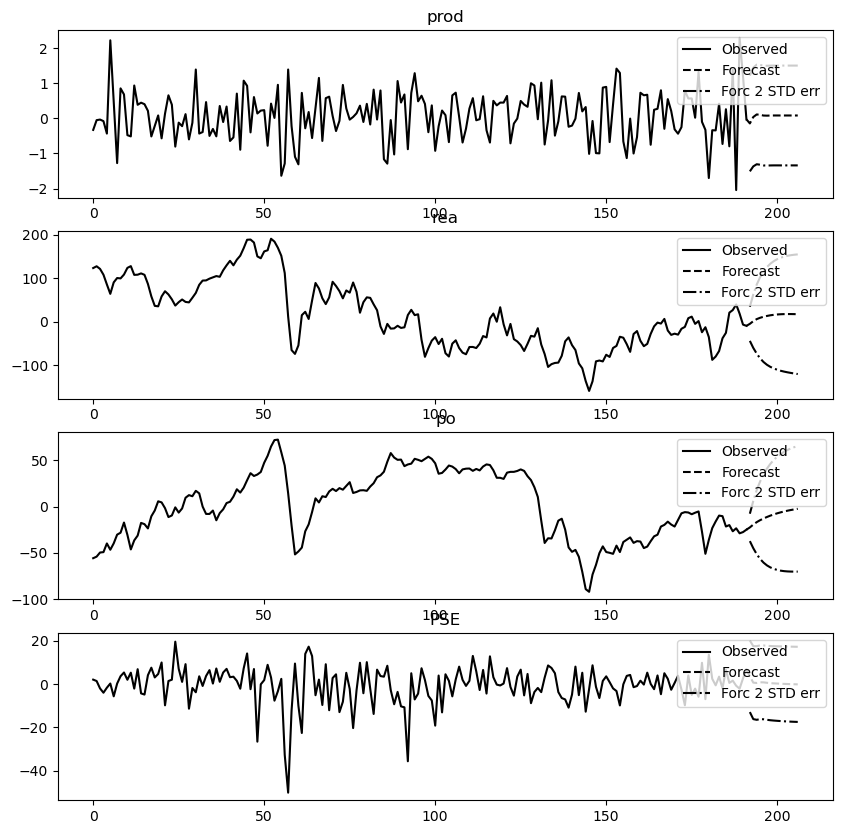

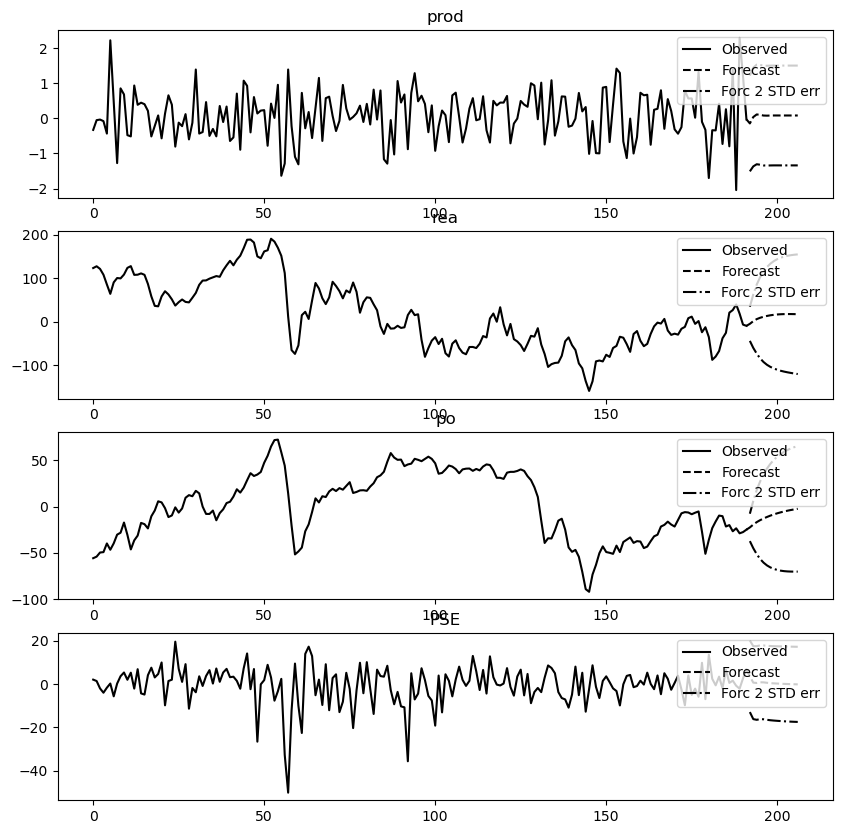

In [139]:
results.plot_forecast(15)

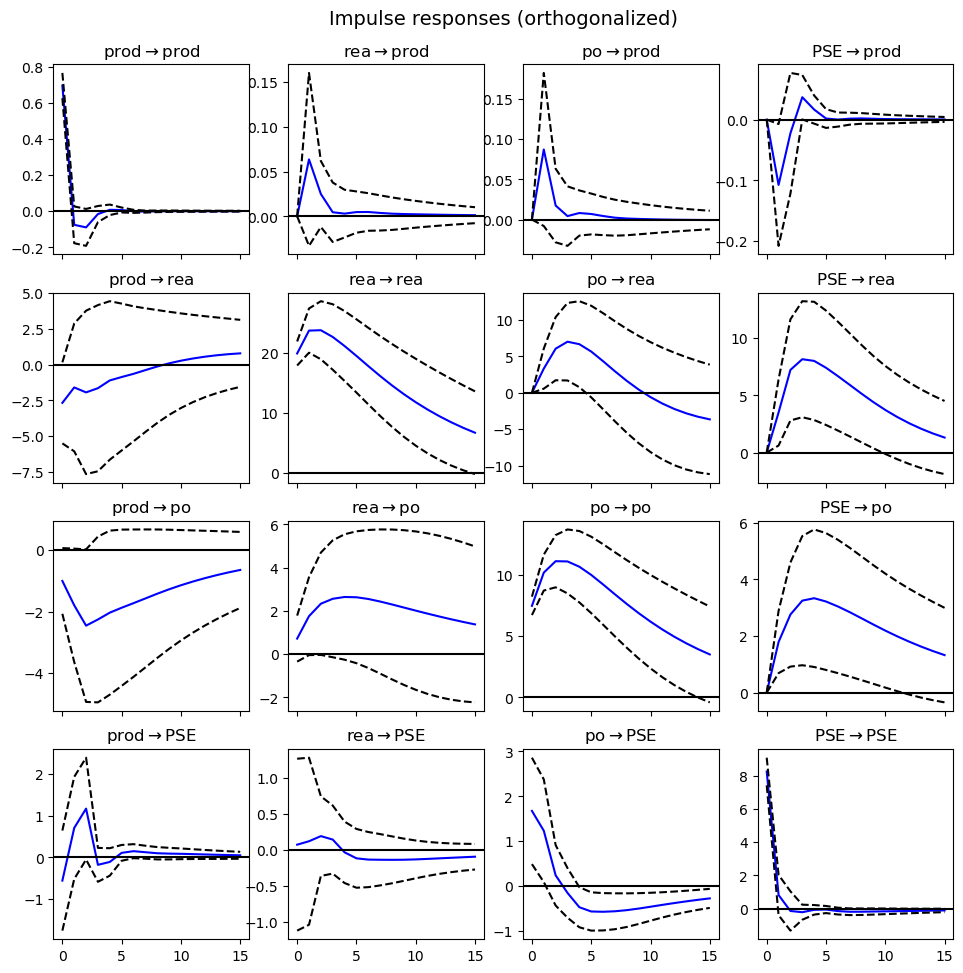

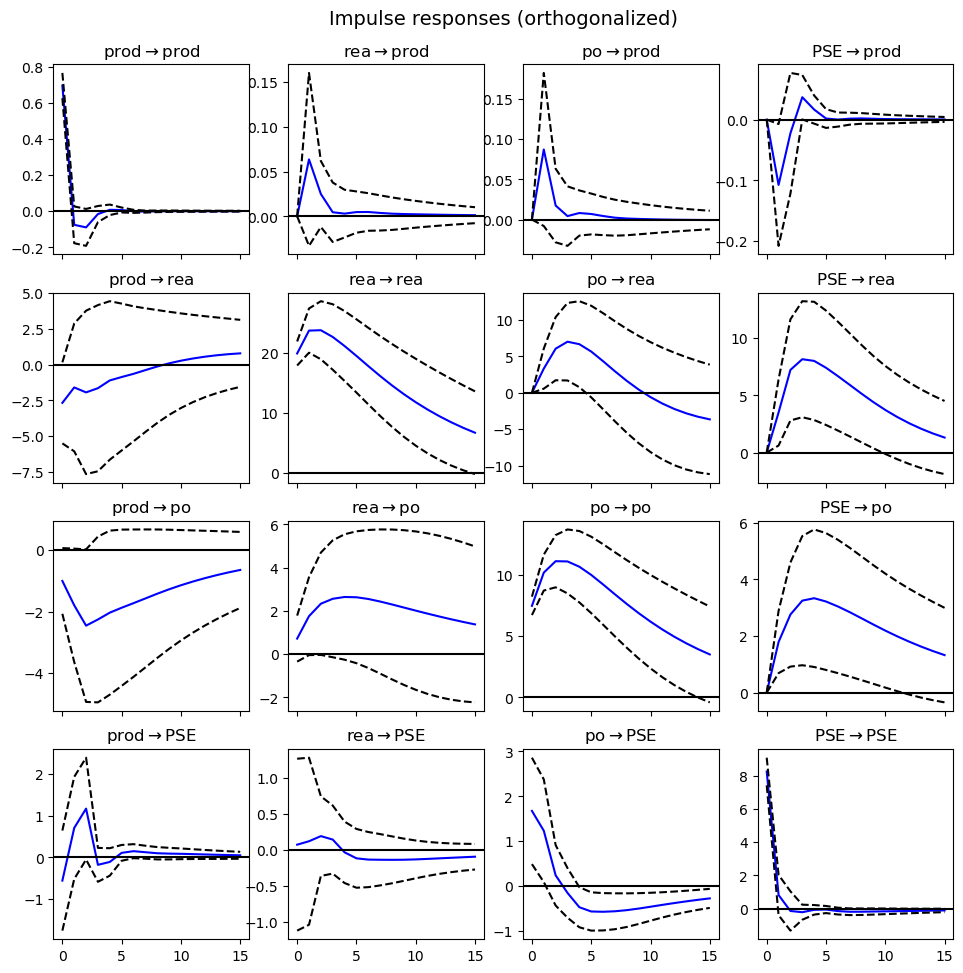

In [140]:
irf = results.irf(15) #in R irf function the orthogonal type is running be defualt.
irf.plot(orth=True)

In [141]:
#irf = results.irf(15)
#irf.plot(orth=False)

In [142]:
irf = results.irf(15)
irf_irfs = irf.irfs
print(irf_irfs)

[[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  1.00000000e+00  0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]

 [[-8.70110411e-02  2.72270559e-03  1.45713436e-02 -1.30374358e-02]
  [ 3.07756965e+00  1.17744063e+00  3.51059350e-01  4.24784508e-01]
  [-3.60798614e-01  4.01694909e-02  1.31471035e+00  2.16666342e-01]
  [ 1.30107660e+00  4.65129189e-04  1.42772779e-01  1.00354195e-01]]

 [[-1.22092413e-01  1.15841369e-03  2.94218090e-03 -2.72178392e-03]
  [ 3.29135748e+00  1.16935005e+00  6.16760035e-01  8.75985170e-01]
  [-9.82099047e-01  6.51496425e-02  1.41285482e+00  3.34505778e-01]
  [ 1.74793834e+00  8.33035954e-03  3.59046170e-02 -1.59636292e-02]]

 [[-1.86523661e-02  2.27324889e-04 -4.24423663e-04  4.46819479e-03]
  [ 3.72030680e+00  1.10878460e+00  7.19584854e-01  9.89316684e-01]
  [-6.22657758e-01  7.70432299e-02  1.3969

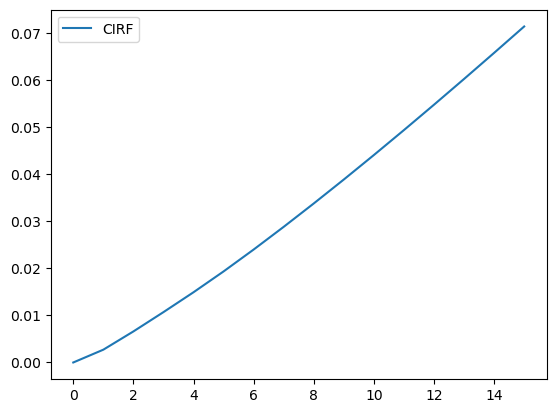

In [143]:
import matplotlib.pyplot as plt

irf = results.irf(15)
cum_irf = irf.cum_effects.cumsum(axis=0)
endog_var = 0  # select the first endogenous variable
impulse_var = 1  # select the second impulse variable
cirf = cum_irf[:, endog_var, impulse_var]
plt.plot(cirf, label='CIRF')
plt.legend()
plt.show()


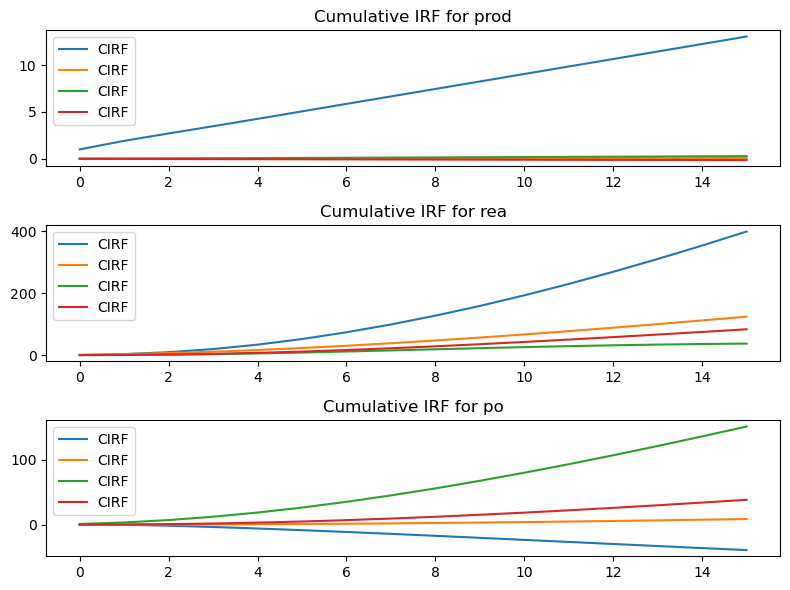

In [144]:
irf = results.irf(15)
cum_irf = irf.cum_effects.cumsum(axis=0)
fig, axs = plt.subplots(3, 1, figsize=(8, 6))
for i in range(3):
    axs[i].plot(cum_irf[:, i, :], label='CIRF')
    axs[i].set_title(f'Cumulative IRF for {results.names[i]}')
    axs[i].legend()
plt.tight_layout()
plt.show()


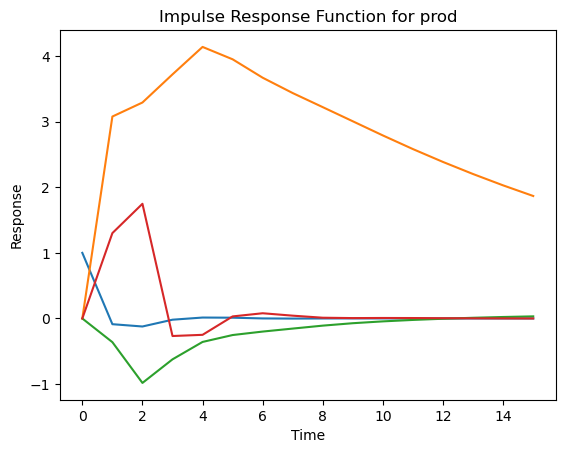

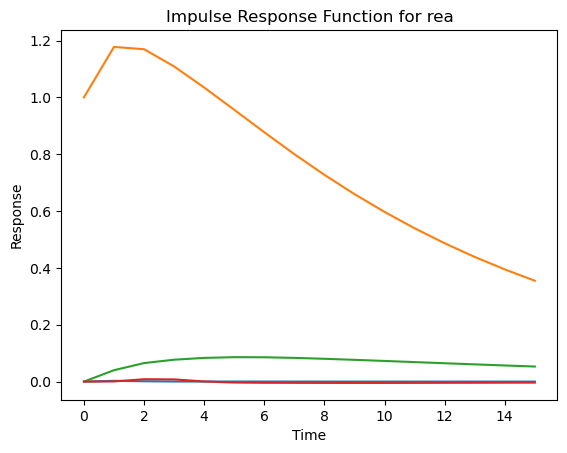

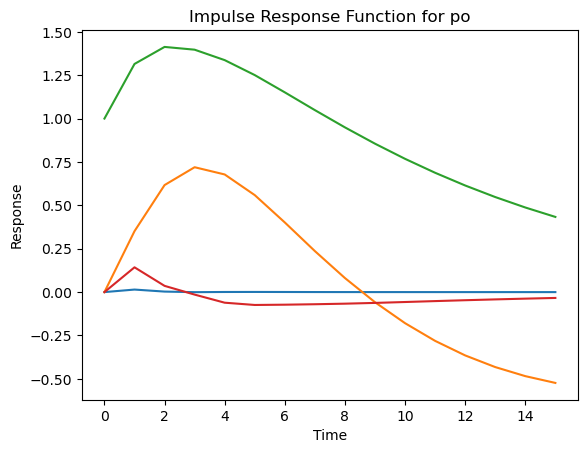

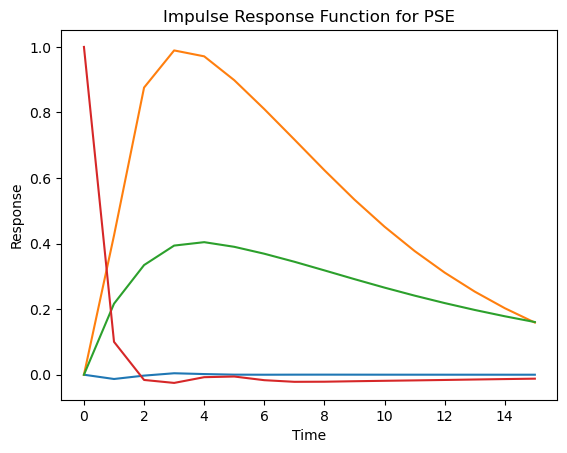

In [145]:
# plot the IRFs for each variable
for i, var in enumerate(model.endog_names):
    plt.figure()
    plt.plot(irf_irfs[:, :, i])
    plt.title(f"Impulse Response Function for {var}")
    plt.xlabel("Time")
    plt.ylabel("Response")
    plt.show()



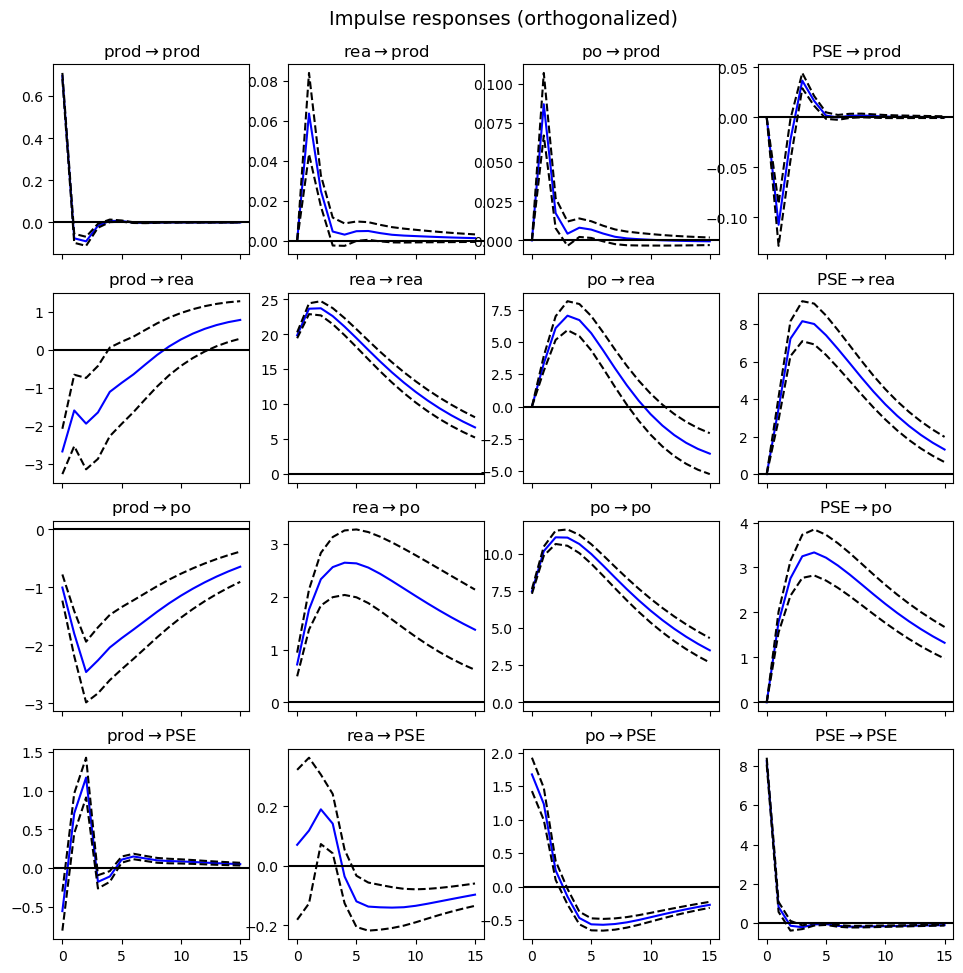

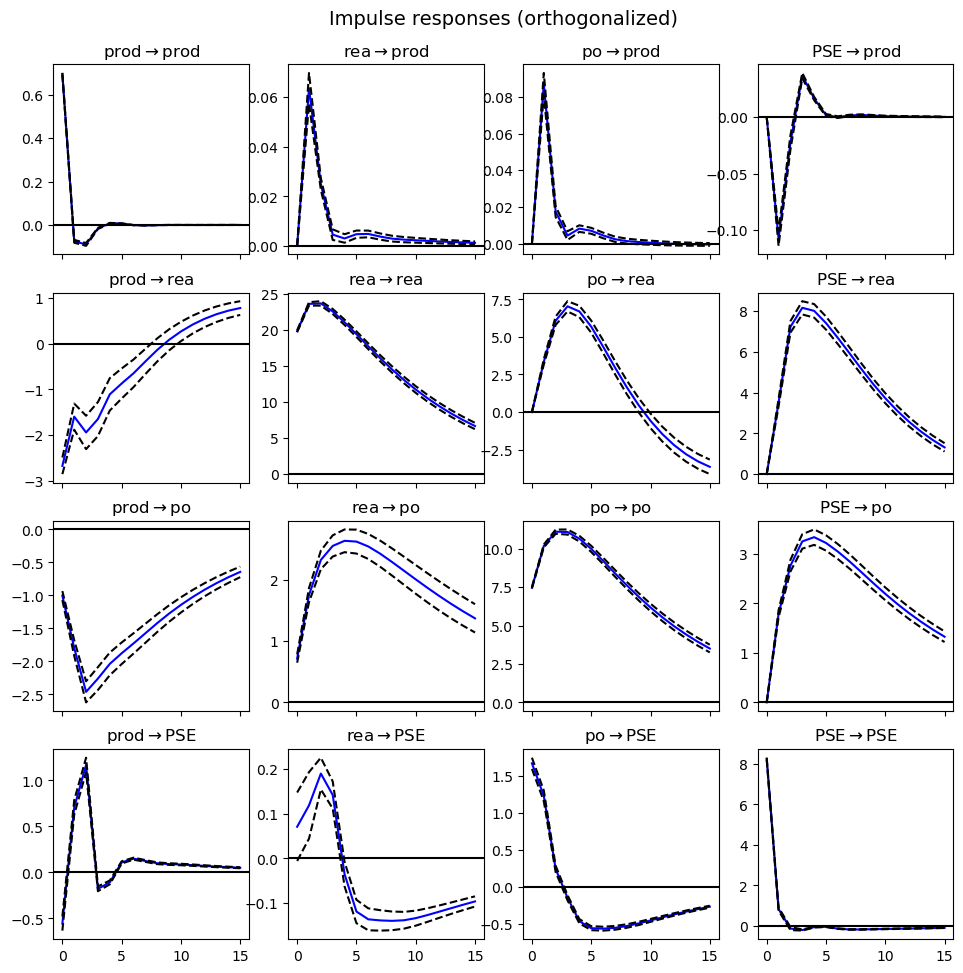

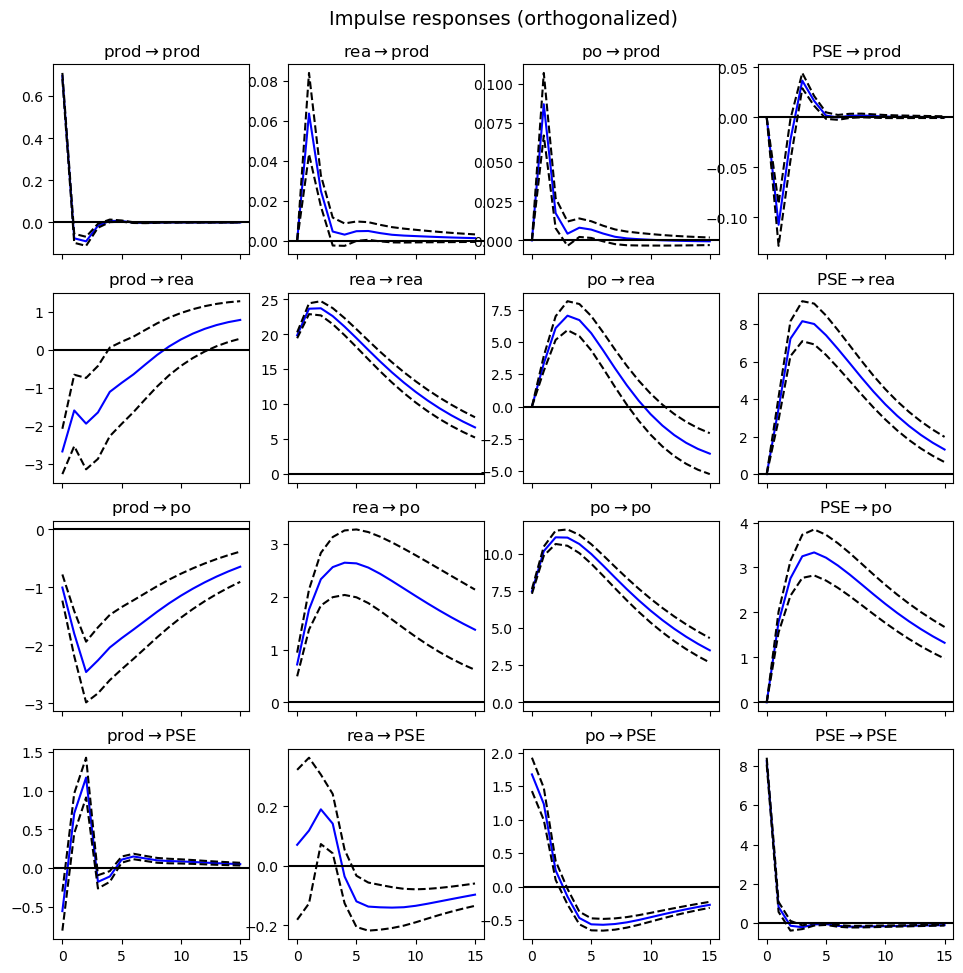

In [146]:
irf = results.irf(15)
irf.plot(orth=True, signif=0.90)  # plot one-standard error confidence band
irf.plot(orth=True, signif=0.68)  # plot two-standard error confidence band


In [147]:
#irf.plot(orth=False)

In [148]:
fevd = results.fevd(100)

In [149]:
fevd.summary()

FEVD for prod
          prod       rea        po       PSE
0     1.000000  0.000000  0.000000  0.000000
1     0.954869  0.007876  0.014741  0.022514
2     0.952953  0.008921  0.015055  0.023071
3     0.950437  0.008932  0.015044  0.025587
4     0.949812  0.008942  0.015158  0.026088
5     0.949683  0.008982  0.015246  0.026088
6     0.949606  0.009026  0.015282  0.026086
7     0.949567  0.009052  0.015292  0.026089
8     0.949541  0.009068  0.015295  0.026096
9     0.949526  0.009080  0.015296  0.026099
10    0.949515  0.009089  0.015296  0.026100
11    0.949507  0.009097  0.015296  0.026101
12    0.949500  0.009103  0.015296  0.026101
13    0.949495  0.009107  0.015296  0.026102
14    0.949491  0.009111  0.015296  0.026102
15    0.949488  0.009114  0.015297  0.026102
16    0.949485  0.009116  0.015297  0.026102
17    0.949483  0.009118  0.015298  0.026102
18    0.949480  0.009119  0.015299  0.026102
19    0.949478  0.009120  0.015300  0.026102
20    0.949477  0.009121  0.015301  0.026